# Aplicación de regresión logística 

En esta clase vamos a complementar la lección anterior.

Vamos a ver como los datos del modelo se ajustan para parecerse a las etiquetas o categorías del dataset. Haciendo que sea la función ideal para el problema de clasificación y de aquí sale la función de Cross - Entropy.

In [18]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
from matplotlib import cm   #Acceder a paletas de colores
import numpy as np
import pandas as pd
import seaborn as sns

## MLE como base para la regresión logística

 Consideramos el problema de MLE: 

$$
\max \sum_i \log P(y_i \vert x_i; h)
$$

donde:

$y_i$: clase o categoría de cada elemento y $x_i$: son los atributos de cada elemento, donde además cada elemento del dataset satisface una distribución de Bernoulli: 

\begin{equation*} \small
P \; \left \{ 
    \begin{array} {lcl}
        P & y=1  & \text{cuando el resultado es exitoso.} \\ 
        1-P & y=0&  \text{cuando el resultado no es exitoso.}
    \end{array}
    \right.
\end{equation*}

En este caso la verosimilitud está dada por: 

$$
L = \hat{y}y+(1-\hat{y})(1-y)  
$$

Esta función da como resultado probabilidades altas cuando $\hat{y} \sim y$.

Vamos a construir una gráfica tridimensional de 2 variables de verosimilitud.
Recordemos que:
- $y_i:$ Categoría o atributo del dataset
- $x_i:$ Dato de la categoría.
- $h:$ Hipótesis de modelamiento (atributos) - Sigmoide

Vamos a realizar una función en Python donde $\hat y = yp$ y es correspondiente a la **función sigmoidal**

In [19]:
#Definiendo función L
def likelihood(y,yp):
    return yp*y + ((1-yp)*(1-y))

Lo que queremos es visualizar la función para tener una claridad de lo que esta función representa.

## Explicación
Vamos a realizar una gráfica de la función `likelihood(y,yp)`, como se puede observar es una función de 2 variables y como es usual en el cálculo de funciones de 2 variables, tenemos que hacer una gráfica de 3 dimensiones: 
>donde los ejes $(x,y)$ son el plano horizontal y el eje vertical es $z$ así $z=$ valores de la verosimilitud.

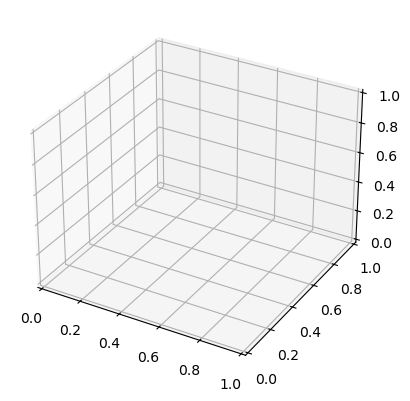

In [20]:
#creando un objeto figura
fig = plt.figure()
#creando ejes
axes= plt.axes(projection='3d')


In [21]:

#definiendo valores para graficar función
y=np.arange(0,1,0.1)    #Valores entre 0 y 1 porque son probabilidades
yp=np.arange(0,1,0.1)   #Exactamente igual 

#Creando malla para trabajar con el plano (cuadricula)
y,yp = np.meshgrid(y,yp)
#con la linea anterior convierto a una malla los valores y,yp

#calculo la función "z" sobre cada elemento de la malla
z=likelihood(y,yp)



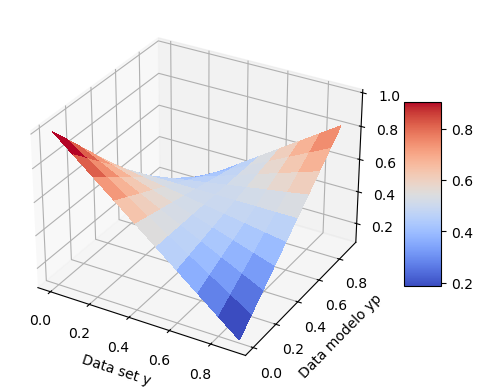

In [22]:
#creando un objeto figura
fig = plt.figure()
#creando ejes
axes= plt.axes(projection='3d')
#Creando la superficie en el espacio de tridimensional
#Gráfica de 2 variables
surf = axes.plot_surface(y, yp, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
axes.set_xlabel('Data set y')
axes.set_ylabel('Data modelo yp')
axes.set_zlabel('Verosimilitud z')

plt.show()

Lo que representa la gráfica es que nuestra función de verosimilitud tiene máximos justo donde los necesitamos. Es decir cuando data set $y$ y data del modelo $\hat y$ (0,0) y (1,1). Dando las probabilidades altas o las mas altas, justo cuando ambas $(y - \hat y)$ coinciden. La visualización justifica este análisis 

Considerando $p\rightarrow \log(p)$ y sumando la verosimilitud para todos los puntos del dataset obtenemos:

$$\max L = \min (-L)$$
En otras palabras; maximizar quiere decir minimizar **el negativo de Verosimilitud**. De manera al proceso de minimizar $-L$ es optimizar esa función en un problema de clasificación y se conoce como **Cross Entropy - Entropía Cruzada**. Y se define como:
$$CE = \underbrace{\quad-\sum_i {\left[\: y_i \log \hat {y_i}+(1-y_i)\log(1-\hat{y_i})\: \right]}\quad}_{\text{Costo }\rightarrow \text{ Clasificación}} $$

## Regresión Logística con Scikit Learn

Recordemos que:

$$
\hat{y} = \frac{1}{1-\exp{(-\text{log-odds})}}
$$

donde:      
$\text{log-odds} = \beta_0x_0 + \beta_1 x_1 + \dots \beta_n x_n$ y los betas son los parámetros del modelo.

Aplicaremos un ejercicio de clasificación simple con el dataset Iris: 
* https://en.wikipedia.org/wiki/Iris_flower_data_set
* https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

In [23]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

atrib_names = ['sepal length', 'sepal width', 'petal length', 'petal width']
X, y = load_iris(return_X_y=True)

La variable X contiene los datos de los parámetros. Es decir las filas o el numero de flores con sus atributos.

In [24]:
X[0]

array([5.1, 3.5, 1.4, 0.2])

In [25]:
len(X)

150

La variable `X` contiene 150 elementos, es decir 150 flores. Dentro de ellas en la variable `y` contiene un numero que esta referido a una categoría de flor. Eso quiere decir que hay 3 categorías o tipos de flor. Veamos:

In [26]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [27]:
len(y)

150

Entonces si queremos tomar las 2 primeras categorías tenemos que tomar, los 100 primeros elementos

In [28]:
y[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Comprobemos que si colocamos `101` nos dará el primer elemento de la tercera categoría.

In [29]:
y[:101]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2])

Comprobado, el siguiente paso es construir el modelo.

La idea es que la función que llamamos `Logistic Regression` la declaremos para hacer un modelo de clasificación, donde el `random_state` es un generador aleatorio que inicializa a las variables del modelo y `solver=liblinear` es el método de optimización del modelo.

Todo esto es para encontrar la mejor combinación de parámetros, y después le decimos al modelo que se ajuste a los datos. **¿cuales datos?** los de las 2 primeras clases `x[:100],y[:100]`. Con esto el modelo quedaría listo, porque fue ajustado con el fit()
 

In [30]:
#Ajustando y creando modelo de clasificación
clf = LogisticRegression(random_state=10, 
    solver='liblinear').fit(X[:100], y[:100])

Ahora le dire que me muestre los **coeficientes** del modelo.

In [31]:
clf.coef_

array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])

Lo interesante aquí es darnos cuenta de que los 4 números anteriores:
```python
array([[-0.40247392, -1.46382925,  2.23785648,  1.00009294]])
```
son los $\beta's$ asociados precisamente a las 4 variables. 

Entonces lo que me dice el modelo es que, las anteriores 4 betas son los parámetros que mejor ajustan en el modelo de clasificación, a las categorías dadas por `y[:100]` (las categorías).


In [32]:
model_coefs = pd.DataFrame(clf.coef_, columns=atrib_names)
model_coefs

,sepal length,sepal width,petal length,petal width
0,-0.402474,-1.463829,2.237856,1.000093


## Extras:
Hola 👋 acá les dejo 3 videos adicionales para complementar esta clase y entender mejor la regresión logística. .

Explicación teórica:

- https://www.youtube.com/watch?v=hJbOaMpjnsA
- https://www.youtube.com/watch?v=yIYKR4sgzI8

Explicación y aplicación con python:
- https://www.youtube.com/watch?v=BHok3wJpmf0
.

Espero que este aporte les sea de utilidad. #NuncaParenDeAprender

------------------------

### Recursos 
- [The iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)
- [The iris dataset - Wikipedia](https://en.wikipedia.org/wiki/Iris_flower_data_set)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [Colab código](https://colab.research.google.com/drive/1jJ0Qv285n9QSMzU9RYPqCQUkUc5g9ISd?usp=sharing)